In [1]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import warnings
import random
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
path1 = "./word2vec_100_3_polish.bin"; dim1 = '100'; m1 = KeyedVectors.load(path1);
path2 = "./word2vec_300_3_polish.bin"; dim2 = '300'; m2 = KeyedVectors.load(path2);
case = [(m1,dim1),(m2,dim2)]

In [3]:
def token_to_vec(m,w):
    try:
        return m[w]
    except Exception as e: 
        print(e)
        return None

In [4]:
task_3_words = ['kpk','szkoda','wypadek','kolizja','nieszczęście','rozwód']

for w in task_3_words:
    print(w)
    for m,dim in case:
        top = m.most_similar(w,topn=5)
        print('\tTOP5_:' + dim)
        for rw,rs in top:
            print('\t\t{}\t{}'.format(rw,rs))    

kpk
	TOP5_:100
		kilopond	0.6665806770324707
		kpzs	0.6363496780395508
		kpu	0.6300562024116516
		sownarkomu	0.6254925727844238
		wcik	0.6224358677864075
	TOP5_:300
		ksh	0.5774794220924377
		cywilnego	0.5498510599136353
		postępowania	0.5285828113555908
		kilopond	0.5151568055152893
		kkkw	0.48344212770462036
szkoda
	TOP5_:100
		krzywda	0.6817898750305176
		pożytek	0.6121943593025208
		strata	0.5968126654624939
		ryzyko	0.5745570659637451
		uszczerbek	0.5639551877975464
	TOP5_:300
		uszczerbek	0.6027276515960693
		krzywda	0.5920778512954712
		strata	0.550269365310669
		despekt	0.5382484197616577
		pożytek	0.531347393989563
wypadek
	TOP5_:100
		przypadek	0.7544811964035034
		okoliczności	0.7268072366714478
		padku	0.6788284182548523
		incydent	0.6418948173522949
		zdarzenie	0.6114422082901001
	TOP5_:300
		przypadek	0.7066895961761475
		okoliczności	0.6121077537536621
		padku	0.6056742072105408
		padki	0.5596078634262085
		incydent	0.5496981143951416
kolizja
	TOP5_:100
		zderzenie	0.843

In [14]:
# not sure if that what it is about

task_5_words = ['sąd najwyższy','trybunał konstytucyjny','szkoda majątkowy','kodeks cywilny','sąd rejonowy']

for w in task_5_words:
    print("Word: {}\t".format(w))
    s = w.split(' ')
    for m,dim in case:
        try:
            f = lambda x: token_to_vec(m,x)
            token = list(map(f,s))
            tmp = token[0] + token[1]
            tmp = tmp/2
            top = m.similar_by_vector(tmp,topn=5)
            print('\tTOP5_:' + dim)
            for rw,rs in top:
                print('\t\t{}\t{}'.format(rw,rs))  
        except Exception as e:
            print('Exception with {}'.format(w))
            print(e)
        finally:
            print('\n')


Word: sąd najwyższy	
	TOP5_:100
		sąd	0.8644266128540039
		trybunał	0.7672435641288757
		najwyższy	0.7527138590812683
		trybunat	0.6843459010124207
		sędzia	0.6718415021896362


	TOP5_:300
		sąd	0.8261206150054932
		trybunał	0.711520791053772
		najwyższy	0.7068409323692322
		sędzia	0.6023203730583191
		sądowy	0.5670486688613892


Word: trybunał konstytucyjny	
	TOP5_:100
		trybunał	0.9073251485824585
		konstytucyjny	0.7998723387718201
		sąd	0.7972990274429321
		bunał	0.7729247808456421
		senat	0.7585273385047913


	TOP5_:300
		trybunał	0.8845913410186768
		konstytucyjny	0.7739969491958618
		sąd	0.7300779819488525
		trybunat	0.6758428812026978
		senat	0.6632090210914612


Word: szkoda majątkowy	
	TOP5_:100
		szkoda	0.8172438144683838
		majątkowy	0.7424530386924744
		krzywda	0.6498408317565918
		świadczenie	0.6419471502304077
		odszkodowanie	0.6392182111740112


	TOP5_:300
		szkoda	0.7971925735473633
		majątkowy	0.7278684973716736
		uszczerbek	0.5841633081436157
		korzyść	0.54740512371063

In [13]:
task_5_words = ['sąd najwyższy','trybunał konstytucyjny','szkoda majątkowy','kodeks cywilny','sąd rejonowy','plus minus']

for w in task_5_words:
    print("Word: {}\t".format(w))
    n,a = w.split(' ')
    for m,dim in case:
        try:
            top = m.most_similar([n,a],topn=5)
            print('\tTOP5_:' + dim)
            for rw,rs in top:
                print('\t\t{}\t{}'.format(rw,rs))  
        except Exception as e:
            print('Exception with {}'.format(w))
            print(e)
        finally:
            print('\n')


Word: sąd najwyższy	
	TOP5_:100
		trybunał	0.725071907043457
		trybunat	0.6678890585899353
		sprawiedliwość	0.6514156460762024
		areopag	0.6490364670753479
		sędzia	0.6439710259437561


	TOP5_:300
		trybunał	0.6728602647781372
		sędzia	0.5766950845718384
		sądowy	0.5391595363616943
		trybunat	0.5262778401374817
		sprawiedliwość	0.5206459164619446


Word: trybunał konstytucyjny	
	TOP5_:100
		bunał	0.7601145505905151
		sąd	0.7573809027671814
		senat	0.7550060749053955
		bunału	0.7373051643371582
		rozjemczy	0.7360601425170898


	TOP5_:300
		sąd	0.6928653717041016
		parlament	0.6646885871887207
		senat	0.6606065630912781
		trybunat	0.6523807048797607
		konstytucja	0.6402434706687927


Word: szkoda majątkowy	
	TOP5_:100
		świadczenie	0.6545475721359253
		odszkodowanie	0.6458810567855835
		dochód	0.6456104516983032
		wydatek	0.6342517137527466
		krzywda	0.6330065727233887


	TOP5_:300
		uszczerbek	0.5711351037025452
		korzyść	0.5423939824104309
		majątek	0.5360758304595947
		krzywda	0.52818

In [12]:
# concept is + + -
task_7_trios = [
    ['sąd','konstytucja','kpk'],
    ['pasażer','kobieta','mężczyzna'],
    ['pilot','kobieta','mężczyzna'],
    ['lekarz','kobieta','mężczyzna'],
    ['nauczycielka','mężczyzna','kobieta'],
    ['przedszkolanka','mężczyzna','kobieta'],
    ['samochód','rzeka','droga'],
    ["królowa", "mężczyzna", "kobieta"] # added to see clasical example
]
# task_7_trios_token = [list(map(token_to_vec,l)) for l in task_7_trios]


for i in range(len(task_7_trios)):
    print('Word: {}'.format(task_7_trios[i]))
    for m,dim in case:
        try:
            f = lambda x: token_to_vec(m,x)
            b,p,n = list(map(f,task_7_trios[i]))
            r = b + p - n
            top = m.similar_by_vector(r,5)
            print('\tTOP5_:{}'.format(dim))
            for w,s in top:
                print('\t\t{}\t{}'.format(w,s))
        except Exception as e:
            print('Exception with {}'.format(w))
            print(e)
        finally:
            print('\n')

Word: ['sąd', 'konstytucja', 'kpk']
	TOP5_:100
		sąd	0.8484209775924683
		konstytucja	0.8322000503540039
		trybunał	0.7756364345550537
		ustawa	0.768037736415863
		dekret	0.7208969593048096


	TOP5_:300
		sąd	0.8255324363708496
		konstytucja	0.798995852470398
		trybunał	0.7041962146759033
		ustawa	0.6793721914291382
		dekret	0.6163084506988525


Word: ['pasażer', 'kobieta', 'mężczyzna']
	TOP5_:100
		pasażer	0.8446224927902222
		pasażerka	0.722925066947937
		stewardessa	0.629162073135376
		stewardesa	0.6267591714859009
		taksówka	0.6172000765800476


	TOP5_:300
		pasażer	0.794208288192749
		pasażerka	0.6724309325218201
		stewardesa	0.5788161158561707
		stewardessa	0.563020646572113
		podróżny	0.4986627697944641


Word: ['pilot', 'kobieta', 'mężczyzna']
	TOP5_:100
		pilot	0.7940387725830078
		nawigator	0.6515690088272095
		pilotka	0.6387545466423035
		oblatywacz	0.6349523663520813
		stewardesa	0.6295650005340576


	TOP5_:300
		pilot	0.7508397102355957
		pilotka	0.6002969741821289
		stewa

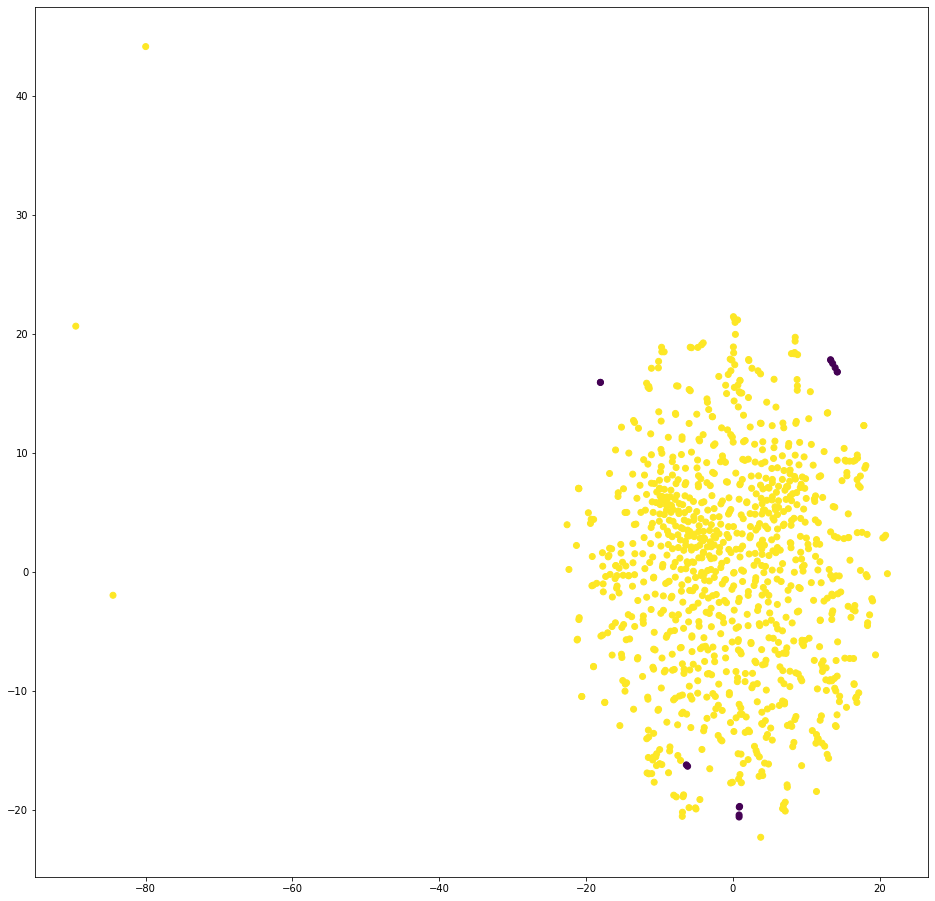

<Figure size 432x288 with 0 Axes>

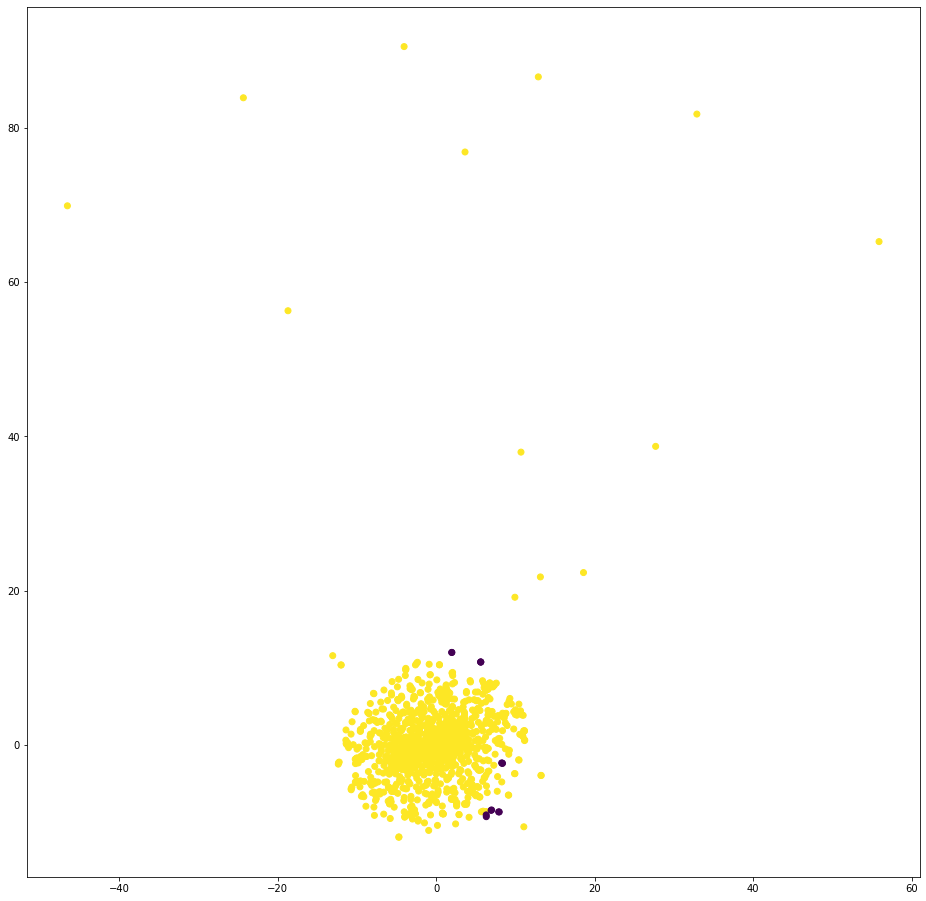

<Figure size 432x288 with 0 Axes>

In [16]:
task_8_words = [
    'szkoda',
    'strata',
    'uszczerbek',
    'krzywda',
    'niesprawiedliwość',
    'nieszczęście',
    'kobieta',
    'mężczyzna',
    'pasażer',
    'pasażerka',
    'student',
    'studentka',
    'lekarz',
    'lekarka',
]
import random
def token_to_vec_silent(m,w):
    try:
        return m[w] 
    except Exception as e: 
        return None; 
    
for m,dim in case:
    word = random.sample(list(m.wv.vocab), k=1200)
    f = lambda x: token_to_vec_silent(m,x)
    vecs = list(map(f,word))
    
    f = lambda x: token_to_vec(m,x)
    task_8_vecs = list(map(f,task_8_words))
    
    filtered_vecs = list(filter(lambda x: x is not None, vecs))[:1000]
    filtered_task_8_vecs = list(filter(lambda x: x is not None, task_8_vecs))
    
    combined = np.array(filtered_vecs + filtered_task_8_vecs)
    
    tsne_transform = TSNE().fit_transform(combined)
    colors = np.concatenate([np.ones(len(filtered_vecs)), np.zeros(len(filtered_task_8_vecs))])
    plt.figure(figsize=(16, 16))
    
    plt.scatter(tsne_transform[:,0],tsne_transform[:,1],c=colors)
    
    plt.show()
    plt.clf()


## Answer the following questions:

Compare results for all experiments with respect to the employed models (100 and 300-d)?

    Usually in most similar words the value of similarity is higher in 100 dimensional case.
    
    As to tsne we can see that in 300D we have more outliers but graphs seems to have very similar density.
    
    But some of them does not have sens for example pilot - mężczyzna + kobieta is pilotka which is in fact a jacet (of course I am joking  :) ). All in all it works even surprisingly well because it can save/keep/see some not trivial facts about words similarity for example przedszkolanka and ochroniarz, both of them are protecting but ochroniarz tends to guard older people while przedszkolanka guards the youngest.
    
    
Compare results for single words and MWEs.

    Usually fitting to a single word is more accurate. It is not shown with value (which is in fact the opposite) but with my personal feeling.


How the results for MWEs could be improved?

    I do not really have good idea about this one because it would involve using.
    But one that could be promising would be weight average for several words and weights could be distributed by a user or by part of speach usually the noun is more important than adjective or preposition.


Are the results for algebraic operations biased?

    We can some false friends for example korzyść and szkoda majątkowa. It is almost the opposite but they usually tends to have similar surrounding and thats way the method show us such big similarity.


According to t-SNE: do representations of similar word cluster together?

    We can see that not all of them are in the same place in the graphe but they tend to split into four clusters on the opposite sides of the main circle. But all of the words are on the border of the circle. The group of words tend to split into four clusters which seems reasonable since some words like szkoda strata uszczerbek krzywda seems very similar also lekarz and lekarka is similar but these two clusters do not have much in common.

